There are a variety of conventional ways to visualize data - tables, histograms, bar graphs, etc. Now that your data have been managed, it is time to graph your variables. This portion of the project is vital as it will provide readers with visual representations of your data and help you to better display your findings. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("gapminderfinal.csv")

In [3]:
df

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,8740.965895,0.030000,0.570000,26.80000,7.594400e+07,25.600000,1.935442,3.65,48.670000,1.484603,0.000000,1173.179044,6.680000,55.700000,24.04
1,Albania,1915.000000,7.290000,1.020000,57.40000,2.237473e+08,42.100000,1.935442,44.99,76.920000,1.484603,9.000000,636.340000,7.700000,51.400000,46.72
2,Algeria,2231.990000,0.690000,2.310000,23.50000,2.932109e+09,31.700000,0.100000,12.50,73.130000,0.420000,2.000000,590.510000,4.850000,50.500000,65.22
3,Andorra,21943.340000,10.170000,1.443963,37.40289,5.033262e+09,47.549438,1.935442,81.00,69.753979,1.484603,3.689441,1173.179044,5.360000,58.635955,88.92
4,Angola,1381.000000,5.570000,1.460000,23.10000,2.483580e+08,69.400000,2.000000,10.00,51.090000,1.484603,-2.000000,173.000000,14.550000,75.700000,56.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,722.810000,3.910000,1.090000,16.20000,1.425435e+09,67.600000,0.400000,27.85,75.180000,1.484603,-7.000000,302.730000,11.650000,71.000000,27.84
209,West Bank and Gaza,8740.965895,6.689412,5.940000,37.40289,1.424133e+07,11.300000,1.935442,36.42,72.830000,1.484603,3.689441,1173.179044,9.640419,32.000000,71.90
210,"Yemen, Rep.",610.360000,0.200000,2.320000,35.10000,2.348647e+08,20.300000,1.935442,12.35,65.490000,1.484603,-2.000000,130.060000,6.270000,39.000000,30.64
211,Zambia,432.230000,3.560000,0.340000,13.00000,1.320257e+08,53.500000,13.500000,10.12,49.030000,1.484603,7.000000,168.620000,12.020000,61.000000,35.42


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               213 non-null    object 
 1   incomeperperson       213 non-null    float64
 2   alcconsumption        213 non-null    float64
 3   armedforcesrate       213 non-null    float64
 4   breastcancerper100th  213 non-null    float64
 5   co2emissions          213 non-null    float64
 6   femaleemployrate      213 non-null    float64
 7   hivrate               213 non-null    float64
 8   internetuserate       213 non-null    float64
 9   lifeexpectancy        213 non-null    float64
 10  oilperperson          213 non-null    float64
 11  polityscore           213 non-null    float64
 12  relectricperperson    213 non-null    float64
 13  suicideper100th       213 non-null    float64
 14  employrate            213 non-null    float64
 15  urbanrate             2

In [5]:
df.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,8740.965895,6.689412,1.443963,37.402890,5.033262e+09,47.549438,1.935442,35.632760,69.753979,1.484603,3.689441,1173.179044,9.640419,58.635955,56.769360
std,13466.912542,4.589345,1.498691,20.444759,2.493649e+10,13.364005,3.632101,26.368642,9.191003,0.987114,5.486034,1341.777091,5.963944,9.611959,23.275759
min,103.780000,0.030000,0.000000,3.900000,1.320000e+05,11.300000,0.060000,0.210000,47.790000,0.030000,-10.000000,0.000000,0.200000,32.000000,10.400000
25%,952.830000,3.230000,0.570000,23.100000,3.795000e+07,40.300000,0.200000,11.500000,65.490000,1.484603,1.000000,431.630000,5.630000,53.500000,37.340000
50%,3665.350000,6.689412,1.210000,35.000000,2.348647e+08,47.549438,1.200000,35.632760,72.230000,1.484603,3.689441,1173.179044,9.510000,58.635955,56.769360
75%,8740.965895,9.500000,1.443963,44.300000,2.421918e+09,53.600000,1.935442,51.960000,76.070000,1.484603,8.000000,1173.179044,11.980000,63.700000,73.500000
max,105147.440000,23.010000,10.640000,101.100000,3.342209e+11,83.300000,25.900000,95.640000,83.390000,12.230000,10.000000,11154.760000,35.750000,83.200000,100.000000


In [6]:
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

## Data Visualization

STEP 1: Create graphs of your variables one at a time (univariate graphs).

### Univariate Data Exploration

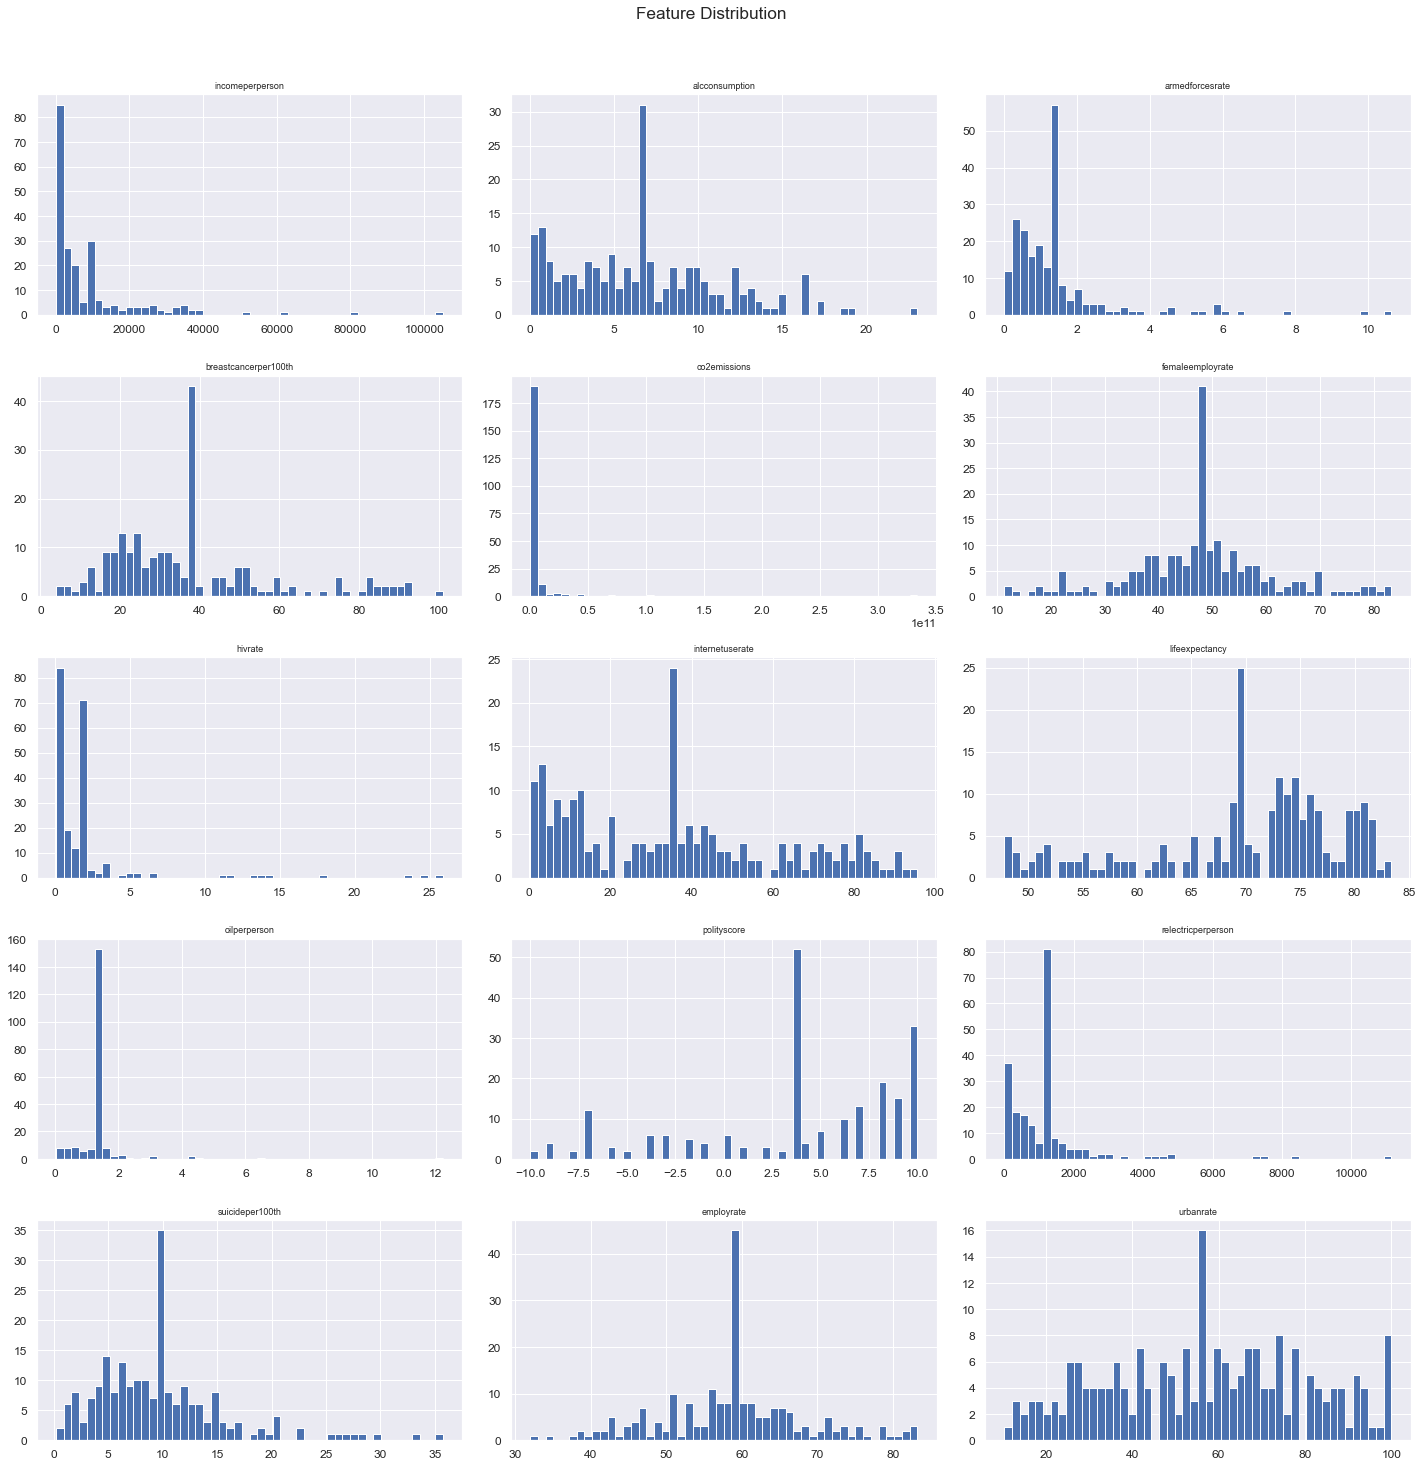

In [7]:
df.hist(bins=50, figsize=(20,20), layout=(5,3))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

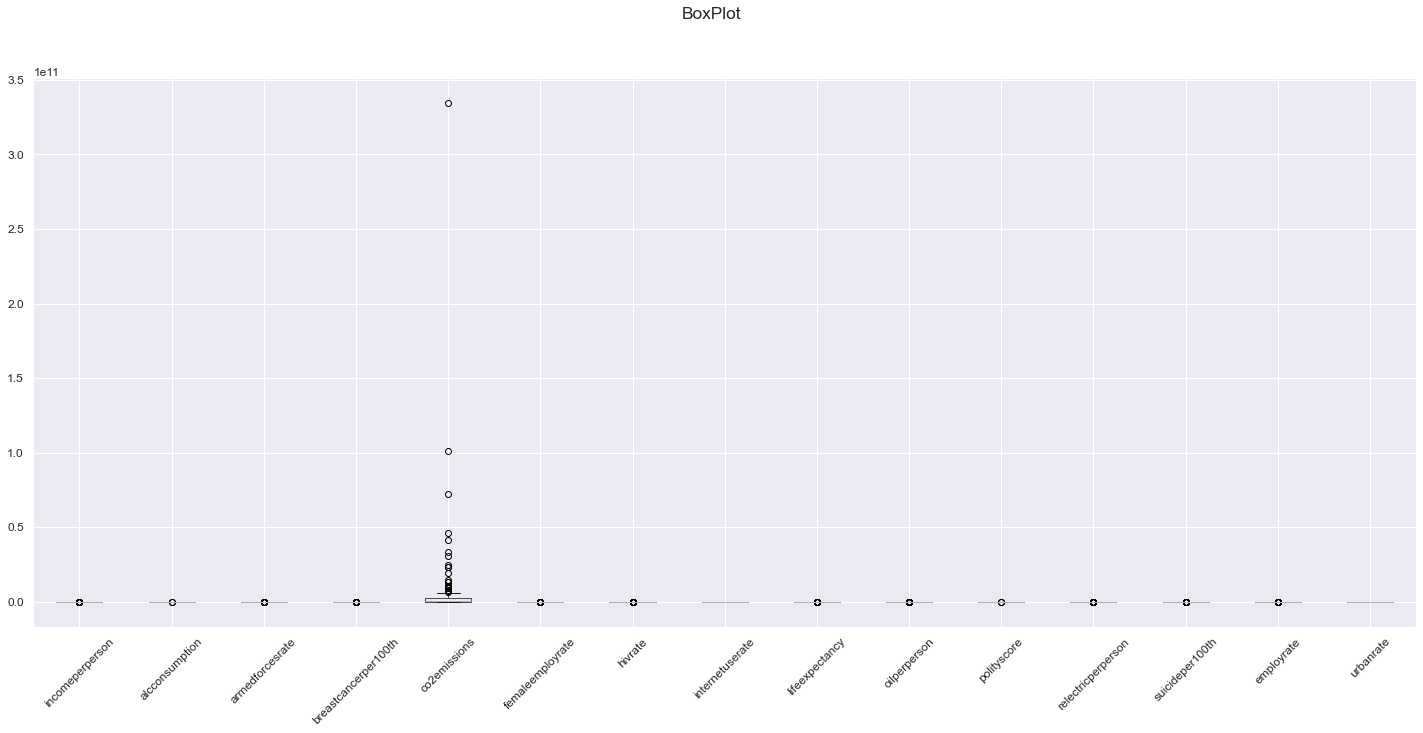

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

STEP 2: Create a graph showing the association between your explanatory and response variables (bivariate graph).

### Pairplots

<Figure size 1440x1440 with 0 Axes>

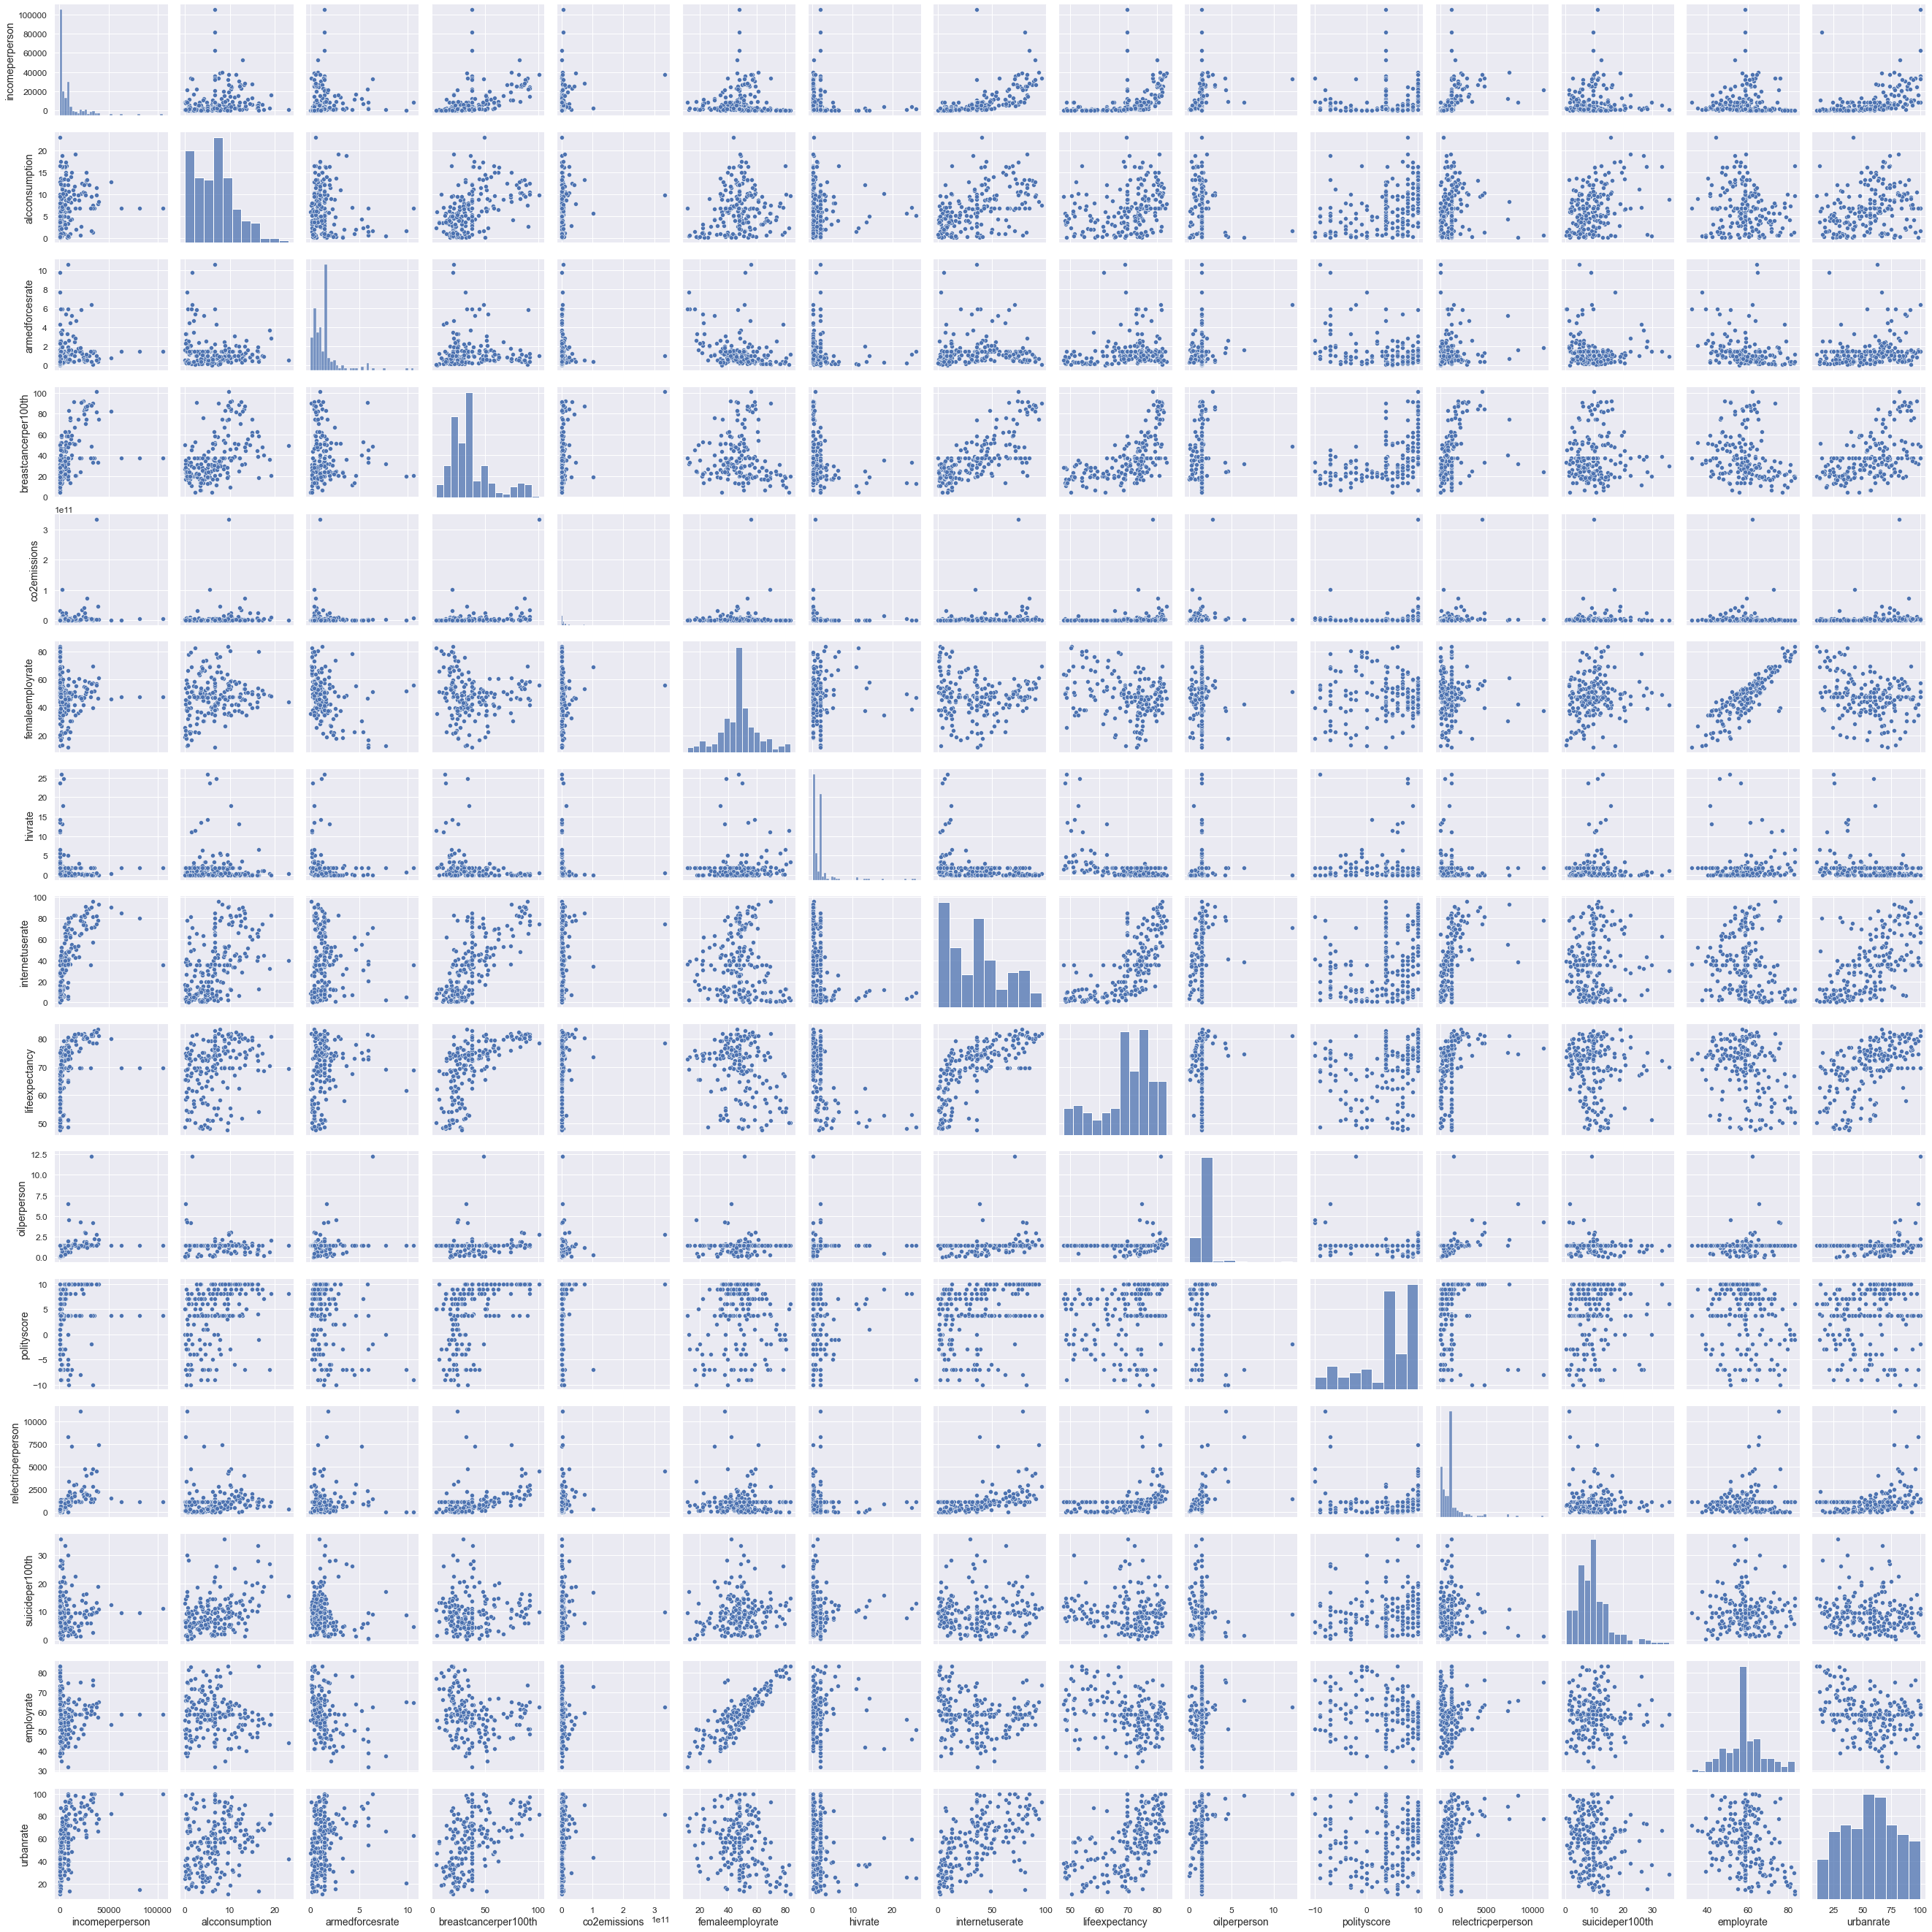

In [9]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df)
plt.show()